In [360]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [361]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [362]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"


BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [364]:
!ls -ltrh

total 352K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
-rw-r--r--  1 root root 339K Nov 17 15:50 N1036783619.root
drwx------  4 root root 4.0K Nov 17 23:43 drive


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT
import numpy as np
import numpy.random as rnd
import scipy as spy
from scipy.stats import chisquare
from scipy.integrate import quad, nquad
import matplotlib.pyplot as plt
import sympy as sp
from numpy.random import rand
from numpy.random import seed

# Parcial 2. Bryan Pérez Múnera, cc. 1036783619


In [0]:

#Se define la función de probabilidad de Landau
def L(x):
  L=ROOT.TMath.Landau(x,mu,c)
  return L


#Se define el algoritmo de metropolis con entradas de tamaño de la muestra y funcion 
def metropolis(N,f):
  x0=1000*rnd.random()
  Y=[x0]
  while len(Y) < N:
    if f(Y[-1])!=0:
      xp=1000*rnd.random()
      dS=-np.log(f(xp)/f(Y[-1]))
      if dS < 0:
        Y.append(xp)
      else:
        x=rnd.random()
        if x < f(xp)/f(Y[-1]):
          Y.append(xp)
  return Y


#Se define la función de chi cuadrado con entradas de numero de bins, valores entregados y muestreados
def Chi(n,xt,xg):
  Ch2=[]
  for i in range (0,n-1):
      if xt[i]>0:
        Ch2p=((xt[i]-xg[i])**2)/xt[i]
        Ch2.append(Ch2p)
      i=i+1
  Chi2=np.sum(Ch2)/n
  return Chi2

  




### Punto 1:

Se leen los datos y se hace un histograma de estos, tomando 250 bins. 

[212.3135986328125, 332.1053771972656, 195.30499267578125, 222.96168518066406, 278.4251708984375, 202.09205627441406, 179.42616271972656, 230.19375610351562, 188.1087646484375, 247.177490234375, 264.5793762207031, 184.17669677734375, 513.1450805664062, 426.4909973144531, 215.28219604492188, 254.63235473632812, 215.4189453125, 229.91468811035156, 250.88462829589844, 320.0572509765625, 290.598876953125, 656.8278198242188, 617.1651000976562, 209.03851318359375, 231.7907257080078, 192.95925903320312, 297.5758056640625, 203.3784637451172, 183.9716339111328, 368.00006103515625, 2644.71240234375, 559.4284057617188, 184.37078857421875, 705.7438354492188, 220.50112915039062, 261.00885009765625, 218.6023406982422, 80384.21875, 242.24708557128906, 1513.3253173828125, 206.53623962402344, 221.40179443359375, 198.73605346679688, 802.356201171875, 370.3543395996094, 190.9890899658203, 203.0401153564453, 263.0284423828125, 218.4017791748047, 200.04617309570312, 273.1344909667969, 247.1041259765625, 24

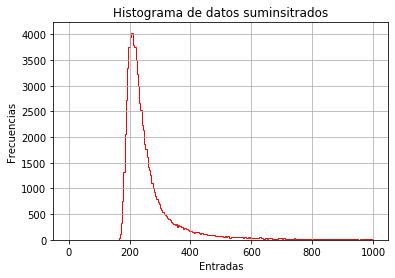

In [435]:
DataChain=ROOT.TChain("SystemTree;1")
DataChain.Add("N1036783619.root") #lectura y extraccion de datos
Datos=[]
for entry in (DataChain): #genera la lista de datos suminstrados
  Datos.append(entry.x)
print(Datos)
plt.hist(Datos,bins=250,range=(0,1000),color='Red',histtype='step',label='Datos suministrados')
plt.title('Histograma de datos suminsitrados')
plt.xlabel('Entradas')
plt.ylabel('Frecuencias')
plt.grid()
plt.show()


### Punto 2:
Se generan 85000 datos a partir de la distribución de Landau y usando el algoritmo de Metrópolis y se hace su histograma superpuesto con el de los datos dados, esto con el fin de visualizar un rango posible para mínimos de $\chi^2$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


[803.7952464326353, 852.0773927142712, 694.4612992926385, 805.2653137778707, 866.3598514265116, 765.3693190604511, 506.9656250665051, 274.6128591621646, 286.688527627124, 370.4410347472732, 574.1435954035251, 389.5435382165058, 189.1529840540399, 517.7909138094835, 761.4332921991469, 497.0948744396225, 526.5198687541339, 311.38004694301844, 568.255409276019, 535.6463566146564, 499.9332694482983, 483.96515429587015, 203.32839191427487, 239.28797747101584, 251.92631521576027, 224.6201778809912, 194.75190760832817, 193.37745714108888, 198.64631649938946, 209.97858594434294, 209.00754903688212, 209.54818313860645, 228.61623042428104, 208.0026930114396, 225.45723017436657, 573.5800623678672, 376.1551538007093, 387.3363466902785, 646.6039070859338, 228.48582398037286, 204.07071282949997, 250.18038582937362, 215.76985187757634, 316.26668007634964, 319.74655793751185, 387.655230057644, 692.8367648948424, 743.8856053322377, 452.92591369296974, 351.4466523730383, 285.6671277425228, 194.046839259

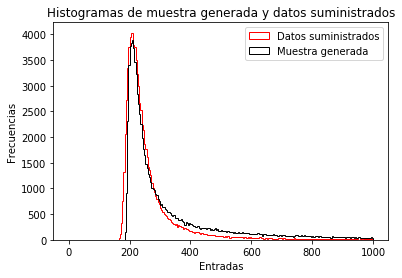

In [429]:
mu=207
c=6.7
X=metropolis(85000,L) #muestreo generado a partir de algoritmo de metropolis
print (X)
plt.hist([X,Datos],bins=250,range=(0,1000),label=['Muestra generada','Datos suministrados'],color=['black','Red'],histtype='step')
plt.title('Histogramas de muestra generada y datos suministrados')
plt.legend()
plt.xlabel('Entradas')
plt.ylabel('Frecuencias')
plt.show()



### Punto 3:
Se establecen valores de $\mu$ y $c$ para los cuáles hay mejor ajuste según prueba de $\chi^2$. Se hace la gráfica de $\chi^2$ en función de estos.



In [393]:
#Se hace manualmente la variación de los parametros mu y c ya que es muy posible que dentro de un loop, dada la estructura del código se demore mucho mas que corriendo las diferentes celdas y anexando los valores de Chi^2 a la lista X2
#En el punto anterior se testeo el rango en el que podria estar el mejor ajuste, este es mu(206,209) y c(6.5,6.9)
#Se varia mu de 206 a 209 y se deja c=6.5
X2=[]
mu=206
c=6.5
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=207
c=6.5
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=208
c=6.5
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=209
c=6.5
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [396]:
#Se varia mu de 206 a 209 y se deja c=6.6
mu=206
c=6.6
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=207
c=6.6
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=208
c=6.6
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=209
c=6.6
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [398]:
#Se varia mu de 206 a 209 y se deja c=6.7
mu=206
c=6.7
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0] #frecuencias de los datos entregados
XH=np.histogram(X, bins=250, range=(0,1000))[0] #frecuencias de los datos muestreados
X2.append(Chi(250,DH,XH)) #anexa a la lista el valor de chi cuadrado segun funcion definida al inicio
mu=207
c=6.7
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=208
c=6.7
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=209
c=6.7
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [399]:
#Se varia mu de 206 a 209 y se deja c=6.8
mu=206
c=6.8
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=207
c=6.8
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=208
c=6.8
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=209
c=6.8
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [400]:
#Se varia mu de 206 a 209 y se deja c=6.9
mu=206
c=6.9
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=207
c=6.9
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=208
c=6.9
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))
mu=209
c=6.9
X=metropolis(85000,L)
DH=np.histogram(Datos, bins=250, range=(0,1000))[0]
XH=np.histogram(X, bins=250, range=(0,1000))[0]
X2.append(Chi(250,DH,XH))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


In [430]:
print(X2) #lista de chi cuadrados calculados
print(X2.index(np.min(X2))) #esto indica que el quinto chi cuadrado que se agrego es el minimo, que corresponde a c=6.6 y mu=206


[118.47946851428884, 117.97043358484622, 120.79831870373101, 126.54269932264738, 115.78549928840334, 118.58531006084922, 120.4176521421751, 129.12644198361014, 118.2941265855103, 127.20358729233726, 123.20425648812902, 127.76630218946197, 120.96918209330333, 116.0667958445698, 125.9654114765063, 128.64109340701407, 116.33368330266772, 119.37303247316557, 116.80677356943691, 129.54074194010613]
4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


[624.8073395200805, 431.873107652737, 977.9469602390024, 756.4665050495036, 594.8310802384427, 732.1727357093366, 621.940683698561, 874.5993212832433, 187.2025167962229, 519.4463584543283, 222.96572134187176, 213.5245188271785, 235.9070479929817, 282.8140943304118, 203.79977342572064, 210.01021195885062, 284.0690951229373, 731.8768050065584, 340.8244186138193, 588.4016961502351, 431.79272223516205, 645.6384676716128, 573.9605623906313, 332.77124120313994, 326.0394993519083, 283.4623261846092, 281.7725973038153, 292.1553233107815, 217.80200835924123, 213.42405595659642, 219.57489878275516, 199.43185996599112, 242.90559228249953, 229.08862436857603, 223.35148240795243, 197.88242137795288, 217.13157270103233, 217.71016185128423, 232.8730290875194, 205.2042900272335, 267.6427004262649, 294.79543493763305, 200.23933703930396, 196.61022265208317, 222.9290021044785, 195.74370993610236, 230.69722805771497, 227.77057044909367, 211.04642028368124, 205.5070350450966, 211.29778768048223, 200.11996

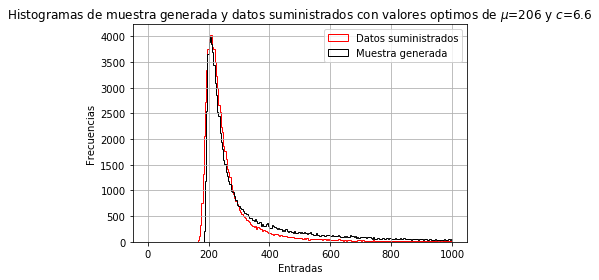

In [436]:
mu=206
c=6.6
X=metropolis(85000,L) #muestreo generado a partir de algoritmo de metropolis
print (X)
plt.hist([X,Datos],bins=250,range=(0,1000),label=['Muestra generada','Datos suministrados'],color=['black','Red'],histtype='step')
plt.title('Histogramas de muestra generada y datos suministrados con valores optimos de $\mu$=206 y $c$=6.6')
plt.legend()
plt.xlabel('Entradas')
plt.ylabel('Frecuencias')
plt.grid()
plt.show()

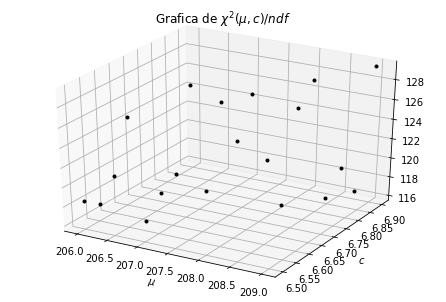

In [434]:
from mpl_toolkits.mplot3d import Axes3D
MU=np.linspace(206,209,20)
C=np.linspace(6.5,6.9,20)
fig=plt.figure()
ax=Axes3D(fig)
plt.xlabel('$\mu$')
plt.ylabel('$c$')
plt.title('Grafica de $\chi^2(\mu,c)/ndf$')
ax.plot(MU, C, X2, ".", color='black')


